In [ ]:
!pip install nltk


In [ ]:

import matplotlib.pyplot as plt
import nltk
import numpy as np
import re 
import pandas as pd
import string
import seaborn as sns

from nltk.corpus import stopwords  
from nltk.stem.lancaster import LancasterStemmer  


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:

set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MINOR2/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/MINOR2/test.csv')
data_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
data_testlabel = pd.read_csv('/content/drive/MyDrive/MINOR2/test_labels.csv')
data_testlabel.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
data_testlabel=data_testlabel[data_testlabel['toxic']!=-1]
data_testlabel

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0
...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,0,0,0,0,0,0
153151,fff9d70fe0722906,0,0,0,0,0,0
153154,fffa8a11c4378854,0,0,0,0,0,0
153155,fffac2a094c8e0e2,1,0,1,0,1,0


In [ ]:
extra_data=pd.merge(data_test,data_testlabel,on="id")
extra_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
63973,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
63974,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
63975,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
63976,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [ ]:
new_data=pd.concat([data,extra_data],ignore_index=True)
new_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [ ]:
data=new_data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223549 entries, 0 to 223548
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             223549 non-null  object
 1   comment_text   223549 non-null  object
 2   toxic          223549 non-null  int64 
 3   severe_toxic   223549 non-null  int64 
 4   obscene        223549 non-null  int64 
 5   threat         223549 non-null  int64 
 6   insult         223549 non-null  int64 
 7   identity_hate  223549 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 13.6+ MB


In [ ]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000
mean,0.095657,0.008777,0.054306,0.003082,0.050566,0.009470
std,0.294121,0.093272,0.226621,0.055431,0.219110,0.096852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
print(data.corr())


                  toxic  severe_toxic  ...    insult  identity_hate
toxic          1.000000      0.289325  ...  0.666690       0.281483
severe_toxic   0.289325      1.000000  ...  0.350608       0.212644
obscene        0.697349      0.375318  ...  0.745039       0.296548
threat         0.161360      0.131472  ...  0.151066       0.115382
insult         0.666690      0.350608  ...  1.000000       0.348853
identity_hate  0.281483      0.212644  ...  0.348853       1.000000

[6 rows x 6 columns]


AxesSubplot(0.125,0.125;0.62x0.755)


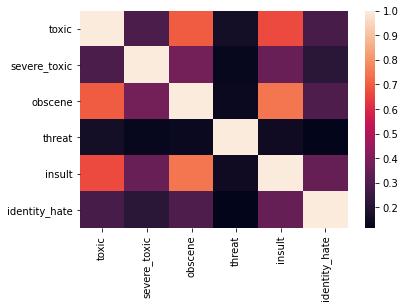

In [ ]:
print(sns.heatmap(data.corr()))

In [ ]:
# checking the skewness for the features:
data.skew()

toxic             2.749529
severe_toxic     10.533266
obscene           3.933431
threat           17.929353
insult            4.102387
identity_hate    10.129561
dtype: float64

In [ ]:

data_count=data.iloc[:,2:].sum()

In [ ]:
data_count

toxic            21384
severe_toxic      1962
obscene          12140
threat             689
insult           11304
identity_hate     2117
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


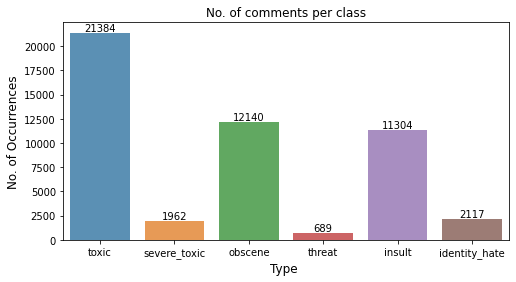

In [ ]:

plt.figure(figsize=(8,4))


ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

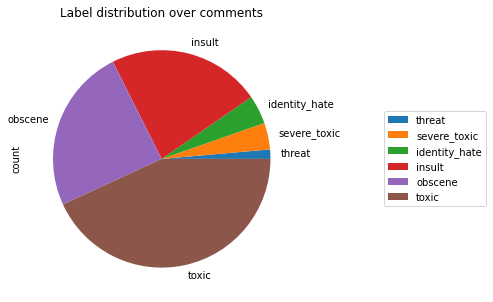

In [ ]:
cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
df_distribution = data[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

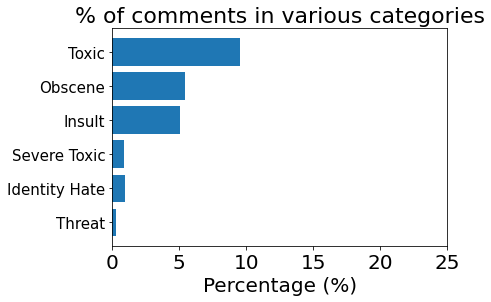

In [ ]:
# Create a bar graph 
num_rows = len(data)
sum_tox = data['toxic'].sum() / num_rows * 100
sum_sev = data['severe_toxic'].sum() / num_rows * 100
sum_obs = data['obscene'].sum() / num_rows * 100
sum_thr = data['threat'].sum() / num_rows * 100
sum_ins = data['insult'].sum() / num_rows * 100
sum_ide = data['identity_hate'].sum() / num_rows * 100


ind = np.arange(6)

ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

plt.gca().invert_yaxis()
plt.show()

In [ ]:
#text before preprocessing
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
# Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'
import re
import string


# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
data['comment_text'] = data['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [ ]:
from nltk.stem import WordNetLemmatizer
# Replace email addresses with 'email'
data['comment_text'] = data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
data['comment_text'] = data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
data['comment_text'] = data['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['comment_text'] = data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
data['comment_text'] = data['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))
data['comment_text'][0]

'explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired'

In [ ]:

data_tox = data.loc[:,['id','comment_text','toxic']]
data_sev = data.loc[:,['id','comment_text','severe_toxic']]
data_obs = data.loc[:,['id','comment_text','obscene']]
data_thr = data.loc[:,['id','comment_text','threat']]
data_ins = data.loc[:,['id','comment_text','insult']]
data_ide = data.loc[:,['id','comment_text','identity_hate']]

In [ ]:

import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

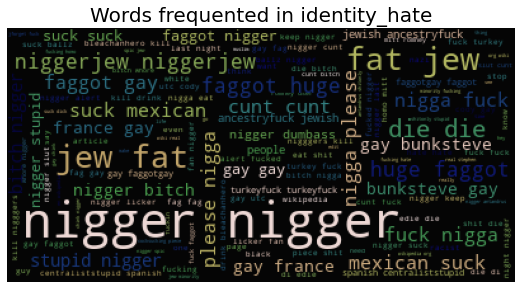

In [ ]:
wordcloud(data_ide,'identity_hate')

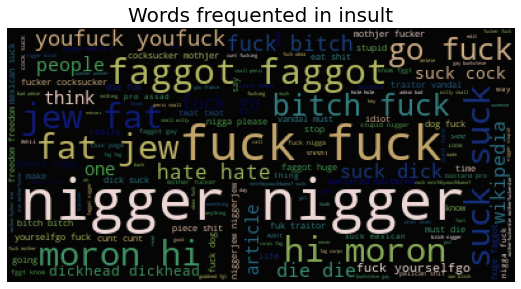

In [ ]:
wordcloud(data_ins, 'insult')

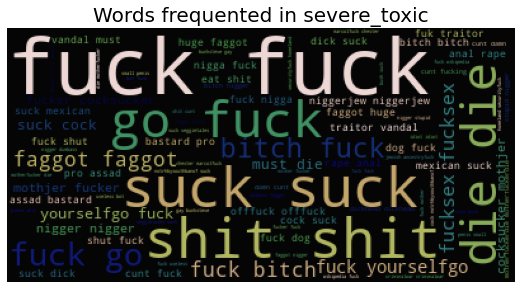

In [ ]:
wordcloud(data_sev, 'severe_toxic')

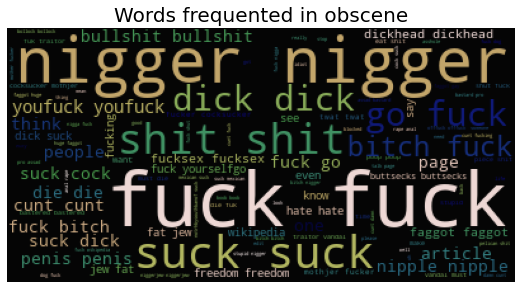

In [ ]:
wordcloud(data_obs, 'obscene')

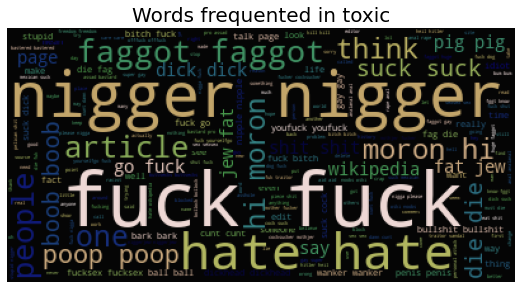

In [ ]:
wordcloud(data_tox, 'toxic')

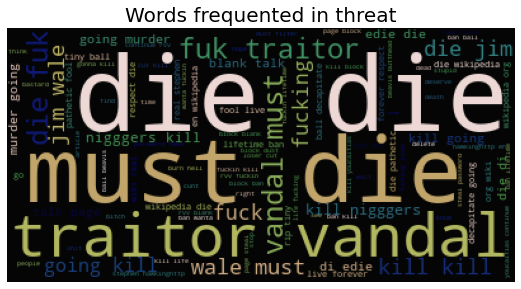

In [ ]:
wordcloud(data_thr, 'threat')

In [ ]:
data_tox_1 = data_tox[data_tox['toxic'] == 1].iloc[:,:]
data_tox_1.shape

(21384, 3)

In [ ]:
data_tox_0 = data_tox[data_tox['toxic'] == 0].iloc[0:22000,:]

In [ ]:
data_tox_done = pd.concat([data_tox_1, data_tox_0], axis=0)
data_tox_done.shape

(43384, 3)

In [ ]:
data_sev[data_sev['severe_toxic'] == 1].count()

id              1962
comment_text    1962
severe_toxic    1962
dtype: int64

In [ ]:
data_sev_1 = data_sev[data_sev['severe_toxic'] == 1].iloc[:,:]
data_sev_0 = data_sev[data_sev['severe_toxic'] == 0].iloc[0:4500,:]
data_sev_done = pd.concat([data_sev_1, data_sev_0], axis=0)
data_sev_done.shape

(6462, 3)

In [ ]:
data_obs[data_obs['obscene'] == 1].count()

id              12140
comment_text    12140
obscene         12140
dtype: int64

In [ ]:
data_obs_1 = data_obs[data_obs['obscene'] == 1].iloc[:,:]
data_obs_0 = data_obs[data_obs['obscene'] == 0].iloc[0:12500,:]
data_obs_done = pd.concat([data_obs_1, data_obs_0], axis=0)
data_obs_done.shape

(24640, 3)

In [ ]:
data_thr[data_thr['threat'] == 1].count()

id              689
comment_text    689
threat          689
dtype: int64

In [ ]:
data_thr_1 = data_thr[data_thr['threat'] == 1].iloc[:,:]

data_thr_0 = data_thr[data_thr['threat'] == 0].iloc[0:1912,:]  
data_thr_done = pd.concat([data_thr_1, data_thr_0], axis=0)
data_thr_done.shape

(2601, 3)

In [ ]:
data_ins[data_ins['insult'] == 1].count()

id              11304
comment_text    11304
insult          11304
dtype: int64

In [ ]:
data_ins_1 = data_ins[data_ins['insult'] == 1].iloc[:,:]
data_ins_0 = data_ins[data_ins['insult'] == 0].iloc[0:11500,:]
data_ins_done = pd.concat([data_ins_1, data_ins_0], axis=0)
data_ins_done.shape

(22804, 3)

In [ ]:
data_ide[data_ide['identity_hate'] == 1].count()

id               2117
comment_text     2117
identity_hate    2117
dtype: int64

In [ ]:
data_ide_1 = data_ide[data_ide['identity_hate'] == 1].iloc[:,:] # 20%
data_ide_0 = data_ide[data_ide['identity_hate'] == 0].iloc[0:5620,:] # 80%
data_ide_done = pd.concat([data_ide_1, data_ide_0], axis=0)
data_ide_done.shape

(7737, 3)

In [ ]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    
    X = df_done.comment_text
    y = df_done[label]
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train)
    X_test_cv1  = cv1.transform(X_test)    
    
        
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    print('lr done')
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)
    print('knn done')

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    print('bnb done')
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    print('mnb done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)
    print('svm done')

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 

    acc_score_data = {'Accuracy Score':[accuracy_score(lr.predict(X_test_cv1), y_test), accuracy_score(knn.predict(X_test_cv1), y_test), 
                                accuracy_score(bnb.predict(X_test_cv1), y_test), accuracy_score(mnb.predict(X_test_cv1), y_test),
                                accuracy_score(svm_model.predict(X_test_cv1), y_test), accuracy_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])
    df_f2 = pd.DataFrame(acc_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])    

    return [df_f1,df_f2]


In [ ]:
df_tox_cv = cv_tf_train_test(data_tox_done, 'toxic', TfidfVectorizer, (1,1))
df_tox_cv[0].rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)

df_tox_cv[0]

# Various permutations of the dataset, category, vectorizer and n-gram

# cv_tf_train_test(data_tox_done, 'toxic', CountVectorizer, (1,1))
# cv_tf_train_test(data_sev_done, 'severe_toxic', CountVectorizer, (1,1))
# cv_tf_train_test(data_obs_done, 'obscene', CountVectorizer, (1,1))
# cv_tf_train_test(data_thr_done, 'threat', CountVectorizer, (1,1))
# cv_tf_train_test(data_ins_done, 'insult', CountVectorizer, (1,1))
# cv_tf_train_test(data_ide_done, 'identity_hate', CountVectorizer, (1,1))

# cv_tf_train_test(data_tox_done, 'toxic', TfidfVectorizer, (1,1))
#cv_tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (1,1))
# cv_tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (1,1))
# cv_tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (1,1))
# cv_tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (1,1))
#cv_tf_train_test(data_ide_done, 'identity_hate', TfidfVectorizer, (1,1))


lr done
knn done
bnb done
mnb done
svm done
rdf done


,F1 Score(toxic)
Log Regression,0.901737
KNN,0.538194
BernoulliNB,0.767709
MultinomialNB,0.881148
SVM,0.906705
Random Forest,0.872124


In [ ]:
df_tox_cv[1].rename(columns={'Accuracy Score': 'Accuracy Score(toxic)'}, inplace=True)
df_tox_cv[1]

,Accuracy Score(toxic)
Log Regression,0.906765
KNN,0.599746
BernoulliNB,0.729400
MultinomialNB,0.886366
SVM,0.909877
Random Forest,0.882794


In [ ]:
df_sev_cv = cv_tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_cv[0].rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)
df_sev_cv[0]

lr done
knn done
bnb done
mnb done
svm done
rdf done


,F1 Score(severe_toxic)
Log Regression,0.883838
KNN,0.515571
BernoulliNB,0.845915
MultinomialNB,0.858238
SVM,0.917167
Random Forest,0.915375


In [ ]:
df_sev_cv[1].rename(columns={'Accuracy Score': 'Accuracy Score(severe_toxic)'}, inplace=True)
df_sev_cv[1]

,Accuracy Score(severe_toxic)
Log Regression,0.928848
KNN,0.784996
BernoulliNB,0.884764
MultinomialNB,0.914153
SVM,0.946636
Random Forest,0.945089


In [ ]:
df_obs_cv = cv_tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (1,1))
df_obs_cv[0].rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)
df_obs_cv[0]

lr done
knn done
bnb done
mnb done
svm done
rdf done


,F1 Score(obscene)
Log Regression,0.924564
KNN,0.584167
BernoulliNB,0.796259
MultinomialNB,0.899019
SVM,0.933637
Random Forest,0.915033


In [ ]:
df_obs_cv[1].rename(columns={'Accuracy Score': 'Accuracy Score(obscene)'}, inplace=True)
df_obs_cv[1]

,Accuracy Score(obscene)
Log Regression,0.927151
KNN,0.593344
BernoulliNB,0.756899
MultinomialNB,0.899756
SVM,0.935065
Random Forest,0.918222


In [ ]:
df_thr_cv = cv_tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv[0].rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
df_thr_cv[0]

lr done
knn done
bnb done
mnb done
svm done
rdf done


,F1 Score(threat)
Log Regression,0.756098
KNN,0.732283
BernoulliNB,0.857143
MultinomialNB,0.714894
SVM,0.859259
Random Forest,0.853933


In [ ]:
df_thr_cv[1].rename(columns={'Accuracy Score': 'Accuracy Score(threat)'}, inplace=True)
df_thr_cv[1]

,Accuracy Score(threat)
Log Regression,0.884837
KNN,0.869482
BernoulliNB,0.925144
MultinomialNB,0.871401
SVM,0.927063
Random Forest,0.925144


In [ ]:
df_ins_cv = cv_tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (1,1))
df_ins_cv[0].rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
df_ins_cv[0]

lr done
knn done
bnb done
mnb done
svm done
rdf done


,F1 Score(insult)
Log Regression,0.908056
KNN,0.504913
BernoulliNB,0.784393
MultinomialNB,0.893485
SVM,0.912478
Random Forest,0.897714


In [ ]:
df_ins_cv[1].rename(columns={'Accuracy Score': 'Accuracy Score(insult)'}, inplace=True)
df_ins_cv[1]

,Accuracy Score(insult)
Log Regression,0.911423
KNN,0.604911
BernoulliNB,0.744354
MultinomialNB,0.894979
SVM,0.914492
Random Forest,0.902872


In [ ]:
df_ide_cv = cv_tf_train_test(data_ide_done, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_cv[0].rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)
df_ide_cv[0]

lr done
knn done
bnb done
mnb done
svm done
rdf done


,F1 Score(identity_hate)
Log Regression,0.824716
KNN,0.246575
BernoulliNB,0.827878
MultinomialNB,0.713287
SVM,0.873810
Random Forest,0.871194


In [ ]:
df_ide_cv[1].rename(columns={'Accuracy Score': 'Accuracy Score(identity_hate)'}, inplace=True)
df_ide_cv[1]

,Accuracy Score(identity_hate)
Log Regression,0.910207
KNN,0.748062
BernoulliNB,0.894703
MultinomialNB,0.867571
SVM,0.931525
Random Forest,0.928941


In [ ]:
f1_all = pd.concat([df_tox_cv[0], df_sev_cv[0], df_obs_cv[0], df_ins_cv[0], df_thr_cv[0], df_ide_cv[0]], axis=1)
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
F1 Score(toxic),0.901737,0.538194,0.767709,0.881148,0.906705,0.872124
F1 Score(severe_toxic),0.883838,0.515571,0.845915,0.858238,0.917167,0.915375
F1 Score(obscene),0.924564,0.584167,0.796259,0.899019,0.933637,0.915033
F1 Score(insult),0.908056,0.504913,0.784393,0.893485,0.912478,0.897714
F1 Score(threat),0.756098,0.732283,0.857143,0.714894,0.859259,0.853933
F1 Score(identity_hate),0.824716,0.246575,0.827878,0.713287,0.873810,0.871194


In [ ]:
acc_all = pd.concat([df_tox_cv[1], df_sev_cv[1], df_obs_cv[1], df_ins_cv[1], df_thr_cv[1], df_ide_cv[1]], axis=1)
acc_all_trp = acc_all.transpose()
acc_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
Accuracy Score(toxic),0.906765,0.599746,0.729400,0.886366,0.909877,0.882794
Accuracy Score(severe_toxic),0.928848,0.784996,0.884764,0.914153,0.946636,0.945089
Accuracy Score(obscene),0.927151,0.593344,0.756899,0.899756,0.935065,0.918222
Accuracy Score(insult),0.911423,0.604911,0.744354,0.894979,0.914492,0.902872
Accuracy Score(threat),0.884837,0.869482,0.925144,0.871401,0.927063,0.925144
Accuracy Score(identity_hate),0.910207,0.748062,0.894703,0.867571,0.931525,0.928941


Text(0.5, 1.0, 'F1 Score of ML models')

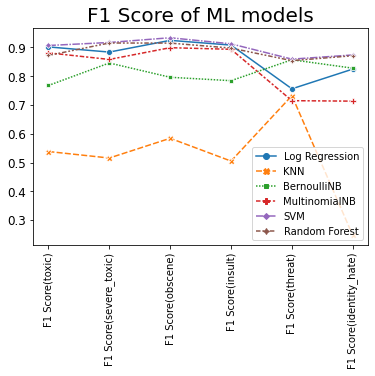

In [ ]:
sns.lineplot(data=f1_all_trp, markers=True)
plt.xticks(rotation='90', fontsize=10)
plt.yticks(fontsize=12)
plt.legend(loc='best')
plt.title('F1 Score of ML models', fontsize=20)

Text(0.5, 1.0, 'Accuracy Score of ML models')

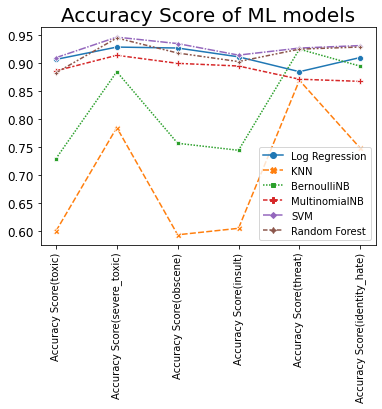

In [ ]:
sns.lineplot(data=acc_all_trp, markers=True)
plt.xticks(rotation='90', fontsize=10)
plt.yticks(fontsize=12)
plt.legend(loc='best')
plt.title('Accuracy Score of ML models', fontsize=20)

In [ ]:
X = data_tox_done.comment_text
y = data_tox_done['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  
X_test_fit = tfv.transform(X_test)  

#randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

#randomforest.fit(X_train_fit, y_train)
#randomforest.predict(X_test_fit)

In [ ]:
comment1 = ["I don't give a fuck"]
comment2 = ['What is up garden apple doing']

comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([1.])

In [ ]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.29416676])

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
svm_model = LinearSVC()
svm_model=CalibratedClassifierCV(svm_model)
svm_model.fit(X_train_fit, y_train)
svm_model.predict(X_test_fit)

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
accuracy_score(svm_model.predict(X_test_fit), y_test)

0.9055777504609711

In [ ]:
accuracy_score(svm_model.predict(X_train_fit), y_train)

0.9830084299262382

In [ ]:
#accuracy_score(randomforest.predict(X_test_fit), y_test)

In [ ]:
comment1 = ["I don't give a hell about you"]
comment2 = ['What is up garden apple doing']

comment1_vect = tfv.transform(comment1)
svm_model.predict_proba(comment1_vect)[:,1]

array([0.99999083])

In [ ]:
comment2_vect = tfv.transform(comment2)
svm_model.predict_proba(comment2_vect)[:,1]

array([0.09813403])

In [ ]:
def train_model(df,label):
    X = df.comment_text
    y = df[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    cv1 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    X_train_fit = cv1.fit_transform(X_train)
    X_test_fit  = cv1.transform(X_test)
    svm_model = LinearSVC()
    svm_model=CalibratedClassifierCV(svm_model)
    svm_model.fit(X_train_fit, y_train)
    #svm_model.predict(X_test_fit)
    res=[accuracy_score(svm_model.predict(X_train_fit), y_train),accuracy_score(svm_model.predict(X_test_fit), y_test),f1_score(svm_model.predict(X_test_fit), y_test),precision_score(svm_model.predict(X_test_fit), y_test),recall_score(svm_model.predict(X_test_fit), y_test)]
    df_res=pd.DataFrame([res],index=[label],columns=["Train Accuracy","Test Accuracy","F1 Score","Precision","Recall"])
    #print (df_res)
    return df_res



In [ ]:
datalist = [data_tox_done, data_sev_done, data_obs_done, data_ins_done, data_thr_done, data_ide_done]
label = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']
df=pd.DataFrame()
for i,j in zip(datalist,label):
    #train_model(i, j)
    df=df.append(train_model(i, j))
df

,Train Accuracy,Test Accuracy,F1 Score,Precision,Recall
toxic,0.981473,0.911490,0.908658,0.894614,0.923151
severe_toxic,0.993229,0.948183,0.920333,0.921429,0.919240
obscene,0.989550,0.937297,0.935852,0.909605,0.963660
insult,0.988215,0.918000,0.916889,0.911622,0.922217
threat,0.998077,0.930902,0.870504,0.823129,0.923664
identity_hate,0.994022,0.937984,0.888631,0.860674,0.918465


In [ ]:
import pickle

In [ ]:
def pickle_model(df, label):
    
    X = df.comment_text
    y = df[label]

    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    X_vect = tfv.fit_transform(X)  
    
    with open(r"{}.pkl".format(label + '_vect'), "wb") as f:   
        pickle.dump(tfv, f)   
        
    #randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    #randomforest.fit(X_vect, y)
    
    model = LinearSVC()
    model=CalibratedClassifierCV(model)
    model.fit(X_vect, y)
    
    with open(r"{}.pkl".format(label + '_model'), "wb") as f:  
        pickle.dump(model, f)

In [ ]:
for i,j in zip(datalist,label):
    pickle_model(i, j)